# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# print out json
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid={weather_api_key}&q={city}"
city_weather = requests.get(city_url).json()
print(city_weather)

{'coord': {'lon': -130.1015, 'lat': -25.066}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 294.11, 'feels_like': 294.45, 'temp_min': 294.11, 'temp_max': 294.11, 'pressure': 1012, 'humidity': 84, 'sea_level': 1012, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 6.72, 'deg': 277, 'gust': 8.79}, 'clouds': {'all': 100}, 'dt': 1693458323, 'sys': {'country': 'PN', 'sunrise': 1693407272, 'sunset': 1693448883}, 'timezone': -28800, 'id': 4030723, 'name': 'Adamstown', 'cod': 200}


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kingston
Processing Record 2 of Set 1 | saint clairsville
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | starokostiantyniv
Processing Record 7 of Set 1 | al ghayzah
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | franceville
Processing Record 10 of Set 1 | langepas
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | afaahiti
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | yuzhnoural'sk
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | el calafate
Processing Record 17 of Set 1 | gorontalo
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | iqaluit
Processing

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kingston,17.9970,-76.7936,30.53,79,20,6.17,JM,1693458323
1,saint clairsville,40.0806,-80.9001,16.29,87,100,2.97,US,1693458323
2,adamstown,-25.0660,-130.1015,20.96,84,100,6.72,PN,1693458324
3,port-aux-francais,-49.3500,70.2167,3.20,87,95,18.98,TF,1693458324
4,stanley,54.8680,-1.6985,7.08,95,84,0.51,GB,1693458324


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kingston,17.9970,-76.7936,30.53,79,20,6.17,JM,1693458323
1,saint clairsville,40.0806,-80.9001,16.29,87,100,2.97,US,1693458323
2,adamstown,-25.0660,-130.1015,20.96,84,100,6.72,PN,1693458324
3,port-aux-francais,-49.3500,70.2167,3.20,87,95,18.98,TF,1693458324
4,stanley,54.8680,-1.6985,7.08,95,84,0.51,GB,1693458324


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [9]:
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit ="s")
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kingston,17.9970,-76.7936,30.53,79,20,6.17,JM,2023-08-31 05:05:23
1,saint clairsville,40.0806,-80.9001,16.29,87,100,2.97,US,2023-08-31 05:05:23
2,adamstown,-25.0660,-130.1015,20.96,84,100,6.72,PN,2023-08-31 05:05:24
3,port-aux-francais,-49.3500,70.2167,3.20,87,95,18.98,TF,2023-08-31 05:05:24
4,stanley,54.8680,-1.6985,7.08,95,84,0.51,GB,2023-08-31 05:05:24
...,...,...,...,...,...,...,...,...,...
563,soio,-6.1349,12.3689,22.41,91,100,2.74,AO,2023-08-31 05:04:19
564,kokpekty,48.7500,82.4000,25.67,39,98,2.53,KZ,2023-08-31 05:06:53
565,clinton,42.5870,-82.9199,14.01,88,0,2.57,US,2023-08-31 05:06:53


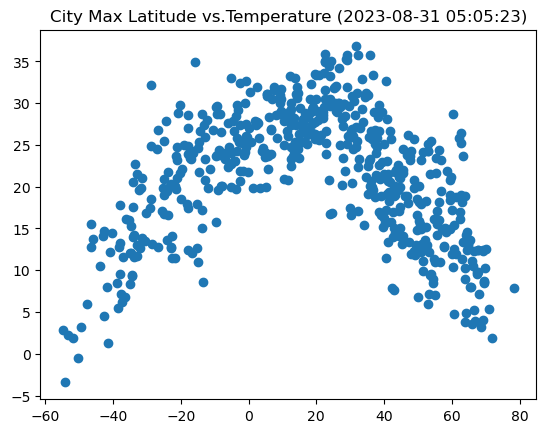

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs.Temperature ({city_data_df.iloc[0,8]})")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

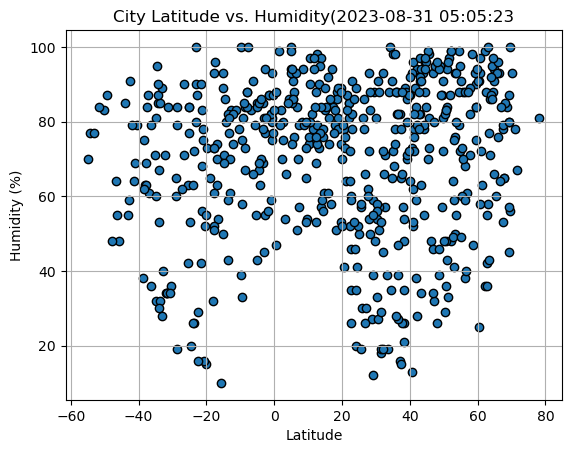

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Humidity"], edgecolors = "black")

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Humidity({city_data_df.iloc[0,8]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

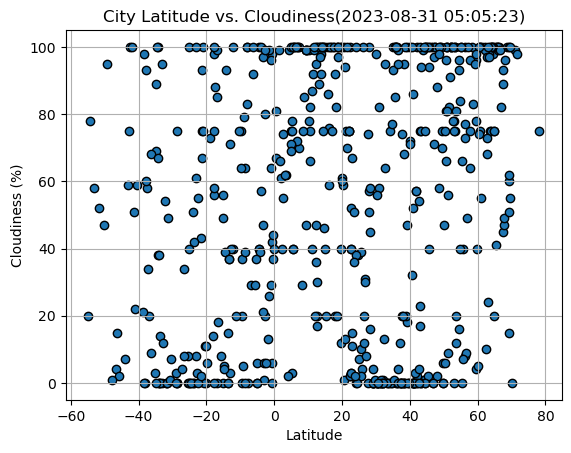

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Cloudiness"], edgecolors = "black")

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Cloudiness({city_data_df.iloc[0,8]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

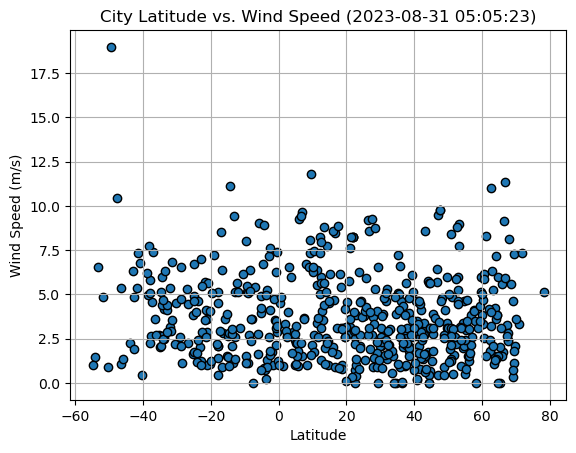

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Wind Speed"], edgecolors = "black")

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({city_data_df.iloc[0,8]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots

from scipy import stats

def create_reg_plot(x_values,y_values, x_label,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")
    print(f"The r value is {rvalue}")

# activity - 6 2 7


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kingston,17.9970,-76.7936,30.53,79,20,6.17,JM,2023-08-31 05:05:23
1,saint clairsville,40.0806,-80.9001,16.29,87,100,2.97,US,2023-08-31 05:05:23
4,stanley,54.8680,-1.6985,7.08,95,84,0.51,GB,2023-08-31 05:05:24
5,starokostiantyniv,49.7576,27.2034,16.60,91,6,3.40,UA,2023-08-31 05:05:24
6,al ghayzah,16.2079,52.1760,27.58,81,76,4.66,YE,2023-08-31 05:05:24


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,20.96,84,100,6.72,PN,2023-08-31 05:05:24
3,port-aux-francais,-49.3500,70.2167,3.20,87,95,18.98,TF,2023-08-31 05:05:24
7,margaret river,-33.9500,115.0667,20.60,53,0,4.19,AU,2023-08-31 05:05:25
8,franceville,-1.6333,13.5836,21.88,87,26,1.03,GA,2023-08-31 05:05:25
11,afaahiti,-17.7500,-149.2833,23.93,73,98,5.16,PF,2023-08-31 05:05:25


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.7311196450371324


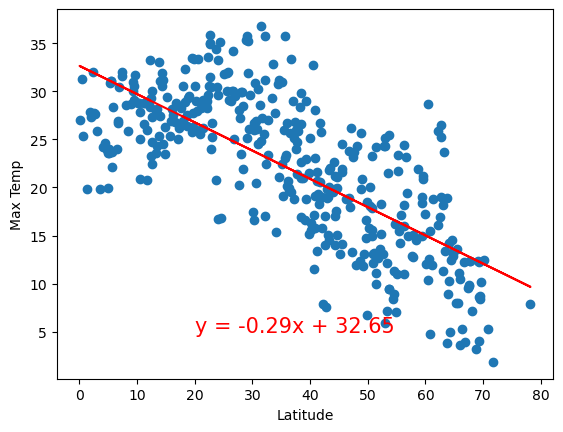

In [56]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
create_reg_plot(x_values,y_values, x_label,y_label)

The r value is 0.7580616274008127


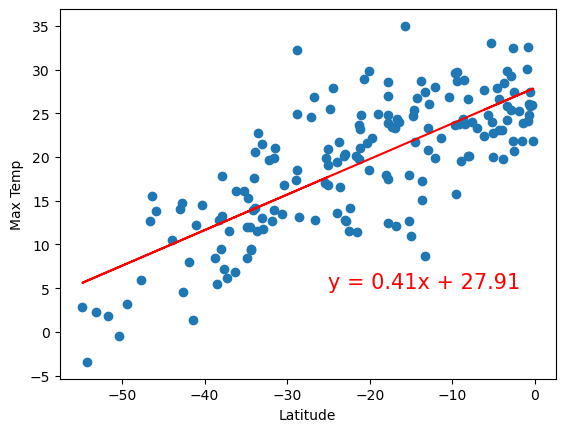

In [57]:
# Linear regression on Southern Hemisphere
def create_reg_plot(x_values,y_values, x_label,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
    print(f"The r value is {rvalue}")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
create_reg_plot(x_values,y_values, x_label,y_label)

**Discussion about the linear relationship:** The Northern Hemisphere shows a negative correlation. As latitude increases, temperature decreases. 
The Southerm Hemisphere shows a positive correlation. As latitude increases, temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.010840294185943126


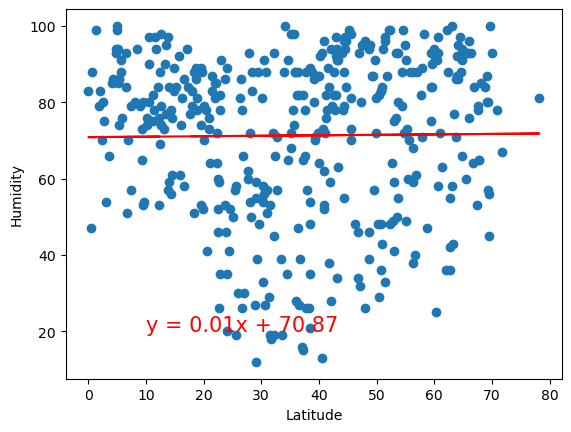

In [61]:
# Northern Hemisphere
def create_reg_plot(x_values,y_values, x_label,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(10,20),fontsize=15,color="red")
    print(f"The r value is {rvalue}")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
create_reg_plot(x_values,y_values, x_label,y_label)

The r value is 0.171884790773894


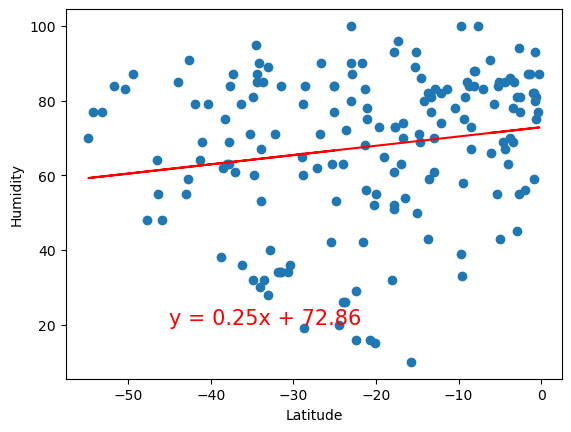

In [63]:
# Southern Hemisphere
def create_reg_plot(x_values,y_values, x_label,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(-45,20),fontsize=15,color="red")
    print(f"The r value is {rvalue}")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
create_reg_plot(x_values,y_values, x_label,y_label)

**Discussion about the linear relationship:** R value is close to zero in both so there is little correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.05420531408723569


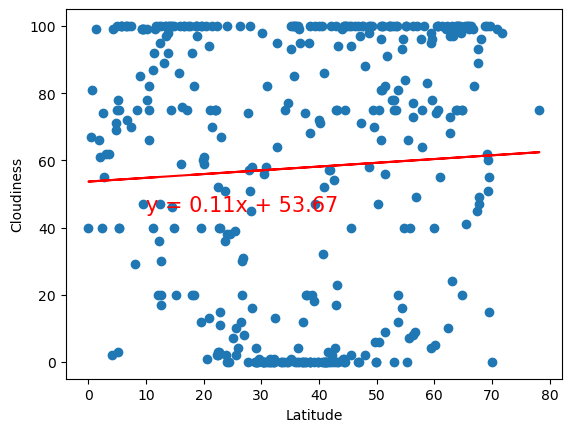

In [69]:
# Northern Hemisphere
def create_reg_plot(x_values,y_values, x_label,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(10,45),fontsize=15,color="red")
    print(f"The r value is {rvalue}")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
create_reg_plot(x_values,y_values, x_label,y_label)

The r value is 0.06571801080849524


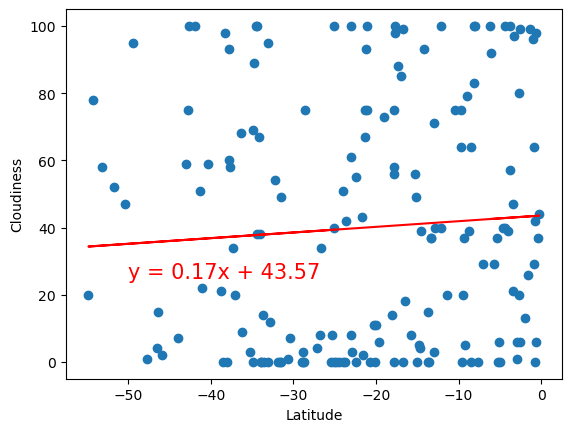

In [73]:
# Southern Hemisphere
def create_reg_plot(x_values,y_values, x_label,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
    print(f"The r value is {rvalue}")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
create_reg_plot(x_values,y_values, x_label,y_label)

**Discussion about the linear relationship:** The r-values don't show a corelation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is -0.053961742148587066


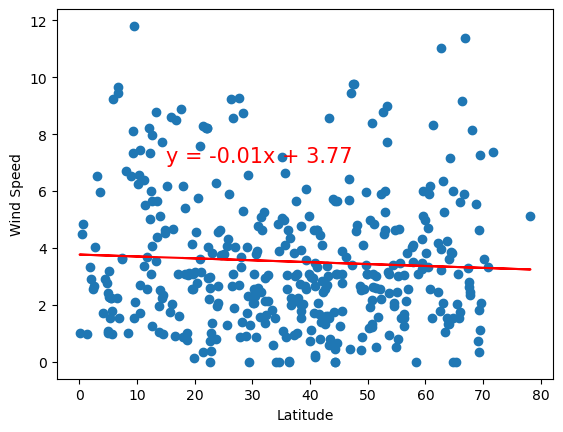

In [76]:
# Northern Hemisphere
def create_reg_plot(x_values,y_values, x_label,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(15,7),fontsize=15,color="red")
    print(f"The r value is {rvalue}")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
create_reg_plot(x_values,y_values, x_label,y_label)

The r value is -0.12601958354727585


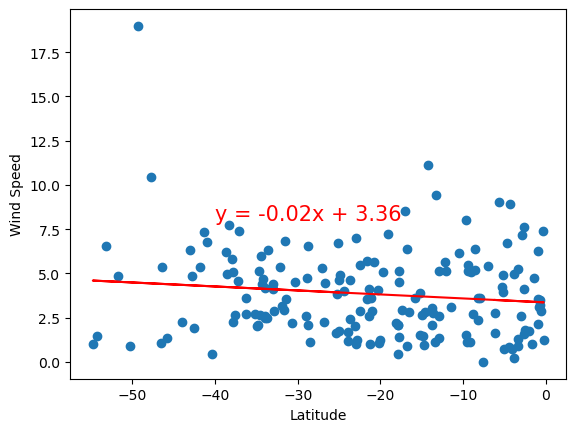

In [78]:
# Southern Hemisphere
def create_reg_plot(x_values,y_values, x_label,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(-40,8),fontsize=15,color="red")
    print(f"The r value is {rvalue}")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
create_reg_plot(x_values,y_values, x_label,y_label)

**Discussion about the linear relationship:** The r value does not show correlation for wind speed and latitude.